### 1.

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

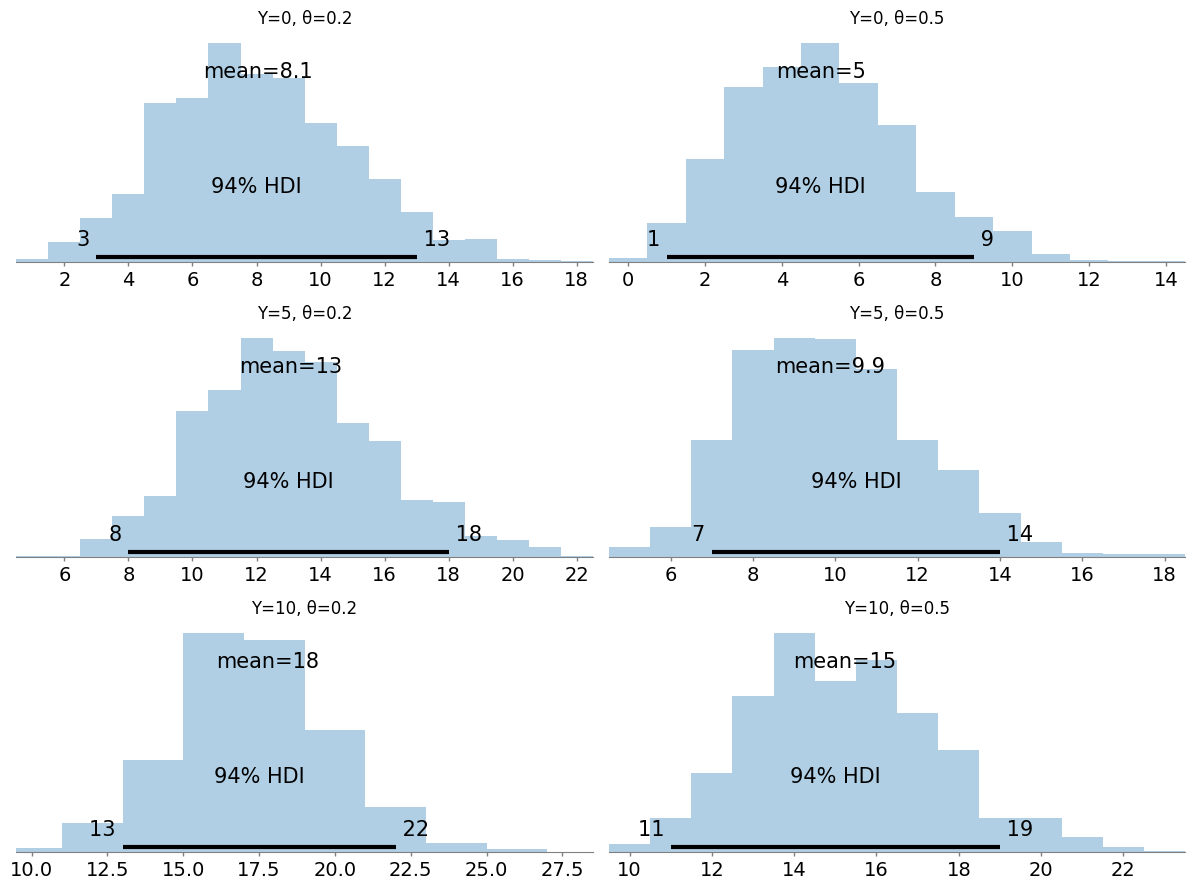

In [4]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

observed_Y_values = [0, 5, 10]
theta_candidates = [0.2, 0.5]

results = []

for observed_Y in observed_Y_values:
    for candidate_theta in theta_candidates:
        with pm.Model() as model:
            n_prior = pm.Poisson("n", mu=10)

            likelihood = pm.Binomial("Y_obs", n=n_prior, p=candidate_theta, observed=observed_Y)

            posterior_samples = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1)

        results.append((observed_Y, candidate_theta, posterior_samples))

fig, axs = plt.subplots(len(observed_Y_values), len(theta_candidates), figsize=(12, 9))
for idx_Y, observed_Y in enumerate(observed_Y_values):
    for idx_theta, candidate_theta in enumerate(theta_candidates):
        ax = axs[idx_Y, idx_theta]
        _, _, trace = results[idx_Y * len(theta_candidates) + idx_theta]
        az.plot_posterior(trace, var_names=["n"], ax=ax)
        ax.set_title(f"Y={observed_Y}, θ={candidate_theta}")
plt.tight_layout()
plt.show()


### 2.

# Efectul parametrilor $Y$ și $\theta$ asupra distribuției a posteriori

### Efectul parametrului $Y$ (numărul de clienți care cumpără)

- **Când $Y$ este mic:**
  - Distribuția a posteriori pentru $n$ este concentrată pe valori mai mici.
  - *Explicație:* Dacă numărul de cumpărători este scăzut, este mai probabil ca numărul total de clienți să fie mic.

- **Când $Y$ este mare:**
  - Distribuția a posteriori pentru $n$ se mută spre valori mai mari.
  - *Explicație:* Un număr mare de cumpărători sugerează că numărul total de clienți $n$ trebuie să fie suficient de mare pentru a susține aceste observații.

### Efectul parametrului $\theta$ (probabilitatea ca un client să cumpere)

- **Când $\theta$ este mic (ex: $\theta = 0.2$):**
  - Distribuția a posteriori pentru $n$ este concentrată pe valori mai mari.
  - *Explicație:* Dacă probabilitatea ca un client să cumpere este mică, este nevoie de un număr mare de clienți pentru a genera același număr $Y$ de cumpărători.

- **Când $\theta$ este mare (ex: $\theta = 0.5$):**
  - Distribuția a posteriori pentru $n$ devine mai concentrată și tinde spre valori mai mici.
  - *Explicație:* Dacă probabilitatea de cumpărare este mare, este nevoie de un număr relativ mic de clienți pentru a explica observațiile $Y$.

### Concluzii
- Valorile mai mari pentru $Y$ sugerează un număr mai mare de clienți $n$.
- Valorile mai mici pentru $\theta$ măresc incertitudinea asupra lui $n$ și deplasează distribuția către valori mai mari.
- Valorile mai mari pentru $\theta$ reduc incertitudinea asupra lui $n$, concentrând distribuția pe valori mai mici.